In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
#reading data:
data= np.load('bank_oversample.npz')
data.files
#npz--> zip file

['arr_0', 'arr_1']

In [3]:
X= data['arr_0']
Y= data['arr_1']

In [4]:
X.shape,Y.shape

((8000, 42), (8000,))

In [5]:
np.random.seed(1001)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2)

In [6]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6400, 42), (1600, 42), (6400,), (1600,))

### BAGGING:

In [7]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
model_log= LogisticRegression()
model_knn= KNeighborsClassifier(n_neighbors=3)
model_tree= DecisionTreeClassifier(max_depth=10)

In [10]:
vc= VotingClassifier([('logistic',model_log),
                     ('KNN',model_knn),
                     ('Decision',model_tree)],voting='soft')

In [15]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkows...
                             ('Decision',
  

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import innomatics

In [17]:
y_pred= vc.predict(x_test)
y_pred_prob= vc.predict_proba(x_test)

#### Metrics:

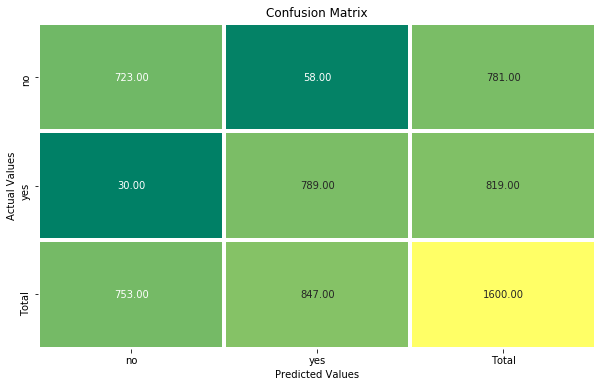

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       781
           1       0.93      0.96      0.95       819

    accuracy                           0.94      1600
   macro avg       0.95      0.94      0.94      1600
weighted avg       0.95      0.94      0.94      1600


************************************Kappa Score************************************


Kappa Score = 0.8898463011670972

******************************Area Under Curve Score******************************


AUC Score = 0.9445530994826771
Number of probabilities to build ROC = 145


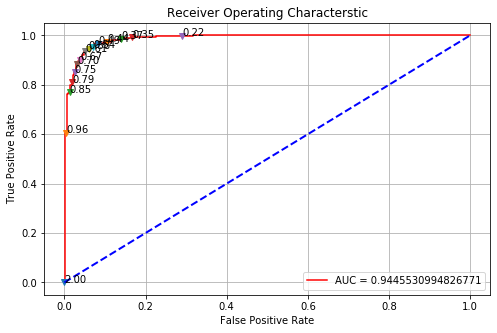

In [19]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob[:,1],
                                label=['no','yes'],n=10,verbose=True)

- ###  BOOTSTRAP SAMPLE TECHNIQUE:

In [20]:
bc=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10)

In [21]:
bc.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [26]:
y_pred= bc.predict(x_test)

In [27]:
y_pred_prob= bc.predict_proba(x_test)

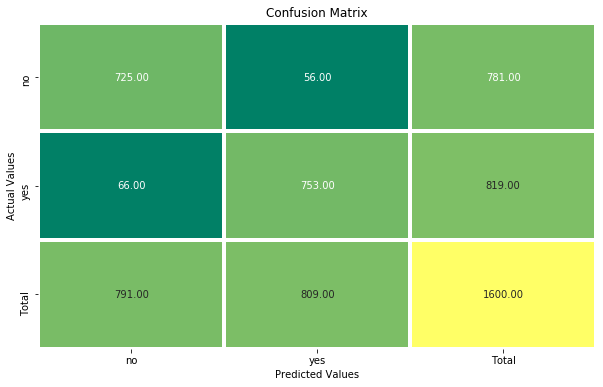

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.92      0.93      0.92       781
           1       0.93      0.92      0.93       819

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600


************************************Kappa Score************************************


Kappa Score = 0.8474592430164934

******************************Area Under Curve Score******************************


AUC Score = 0.9238554872357688
Number of probabilities to build ROC = 12


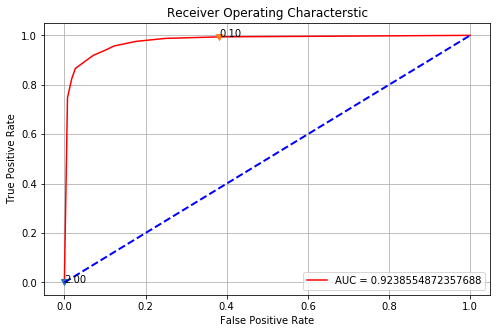

In [29]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob[:,1],label=['no','yes'],n=10,verbose=True)

- ### Random Forest:

In [40]:
df= pd.read_csv('F://bank_oversample_new.csv')

In [41]:
df.head(5)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,result
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [42]:
X1= df.iloc[:,:-1]
Y1= df.iloc[:,-1]

In [43]:
X1.shape, Y1.shape

((8000, 42), (8000,))

In [44]:
np.random.seed(1001)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X1,Y1,test_size=0.2)

In [45]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6400, 42), (1600, 42), (6400,), (1600,))

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model_rf= RandomForestClassifier(n_estimators=20,criterion='gini',max_features=0.2)### n_estimator is no of decision trees

In [50]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
y_pred= model_rf.predict(x_test)

In [52]:
y_pred_prob = model_rf.predict_proba(x_test)

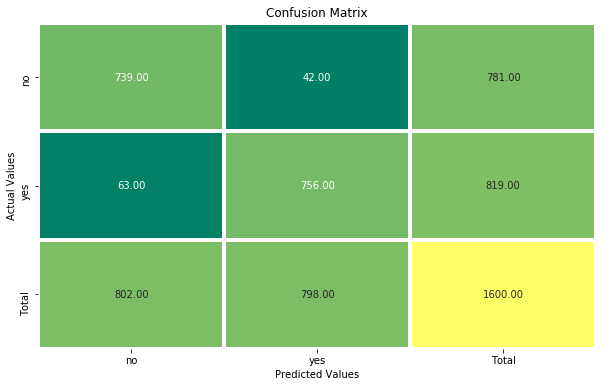

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.92      0.95      0.93       781
           1       0.95      0.92      0.94       819

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600


************************************Kappa Score************************************


Kappa Score = 0.86875779250607

******************************Area Under Curve Score******************************


AUC Score = 0.9346498571850685
Number of probabilities to build ROC = 12


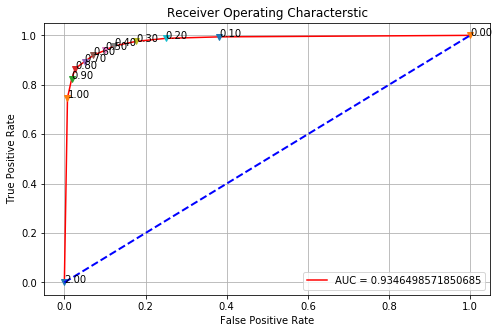

In [54]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob[:,1],label=['no','yes'],verbose=True)

##### GRID SEARCH METHOD:- (PRUNING)

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
model_tune= RandomForestClassifier()

In [57]:
tune_parameter = [{'n_estimators':[10,20,30],
                  'criterion':['gini','entropy'],
                  'max_depth':[10,15],
                   'max_features':['sqrt','log2']}]

In [59]:
clf= GridSearchCV(model_tune,param_grid=tune_parameter,cv=5,scoring='roc_auc')

In [60]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [61]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 30}

In [65]:
clf.best_score_   #ROC score

0.9849660251884665

In [63]:
model_final= RandomForestClassifier(criterion='gini',
                                     max_depth=15,
                                     max_features='sqrt',
                                    n_estimators=20)

In [66]:
model_final.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
y_pred= model_final.predict(x_test)
y_pred_prob = model_final.predict_proba(x_test)

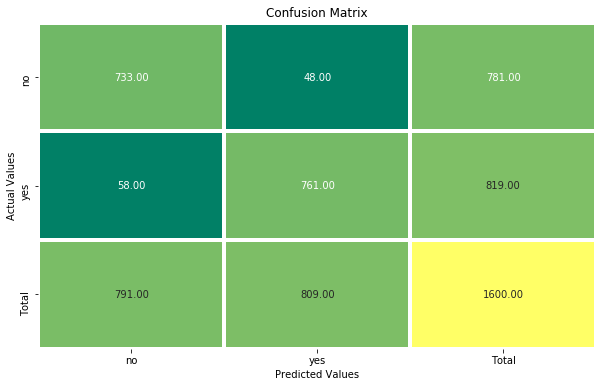

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.93      0.94      0.93       781
           1       0.94      0.93      0.93       819

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600


************************************Kappa Score************************************


Kappa Score = 0.8674645881946583

******************************Area Under Curve Score******************************


AUC Score = 0.9338611310442296
Number of probabilities to build ROC = 380


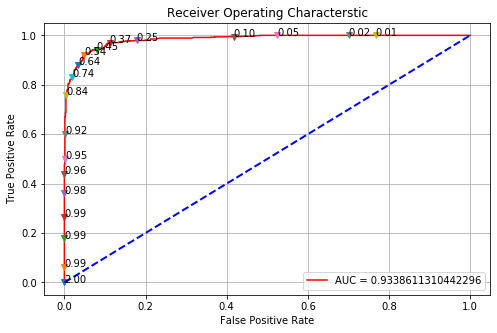

In [69]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob[:,1],label=['no','yes'],verbose=True,n=20)

In [70]:
#feature importance:

In [80]:
features = pd.DataFrame()
features['Features']= X1.columns

In [81]:
features['Support']=model_final.feature_importances_

In [89]:
features.sort_values('Support',ascending=False,inplace=True)
features.set_index('Features',inplace=True)

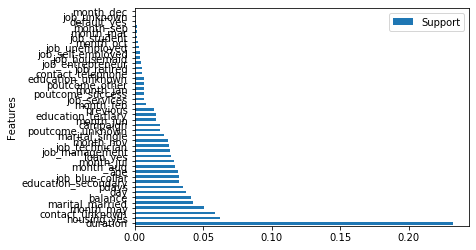

In [90]:

features.plot(kind='barh')   # names should display in y-axis

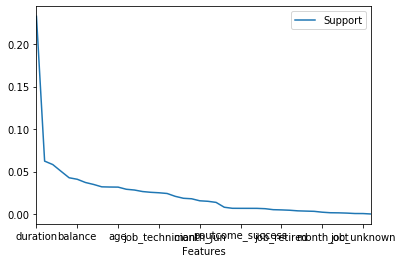

In [91]:
#selecting features:
features.plot(kind='line')

In [95]:
features.reset_index(inplace=True)

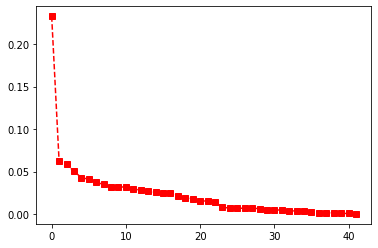

In [96]:
plt.plot(features['Support'],'rs--')

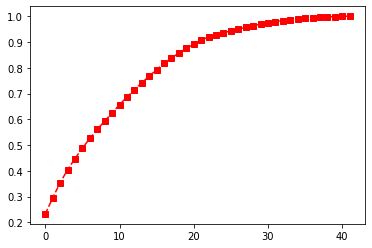

In [97]:
plt.plot(np.cumsum(features['Support']),'rs--')